In [5]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

#### <h1 style="text-align:center">Clase 14: Sistema de vibración de dos grados de libertad. El absortor dinámico de vibraciones </h1>
<h3 style="text-align:center">ACUS125: Aislamiento y Análisis de Vibraciones</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<a href="https://github.com/vpobleteacustica/ACUS125-Aislamiento-y-Analisis-de-Vibraciones">https://github.com/vpobleteacustica/ACUS125-Aislamiento-y-Analisis-de-Vibraciones</a><br> 
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br> 

### El absortor dinámico de vibraciones

+ El absortor dinámico de vibraciones también llamado amortiguador de masa afinada (tuned-mass damper) es usado ampliamente como dispositivo de control de vibraciones.

### Sistema no amortiguado, forzado armónicamente

<p style="text-align:center">
	<img src="sisprin.png" alt="MDOF" width=30%/></a><br>
    <strong> Figura 1: Sistema de vibración con aisladores.</strong>
</p>

+ El clásico absortor dinámico no amortiguado, se introdujo en la literatura en 1928 por J. Ormondroyd y J.P. Den Hartog:

+ Ref: Ormondroyd J. & Den Hartog, J.P. 1928 The theory of the dynamic vibration absorber. Transactions of the American Society of Mechanical Engineers, 50, A9-A22.

+ https://www.acs.psu.edu/drussell/Demos/absorber/DynamicAbsorber.html

+ Los autores idearon un interesante método de control de vibraciones para este sistema.

+ Una fuerza armónica $f(t)$ actúa sobre un sistema principal, referido como masa $m_{1}$ y resorte $k_{1}$.

+ Si ningún amortiguamiento está presente, cuando la frecuencia de la fuerza se iguala a la frecuencia natural que tiene el sistema, la respuesta crece hasta el infinito. 

+ Esto se llama resonancia y causa dramáticos problemas a este tipo sistemas vibratorios.

+ Sin usar amortiguamiento! la respuesta en resonancia se puede reducir absorbiendo la energía creada durante la respuesta.

+ La absorción de la energía se logra uniendo al sistema principal masa $m_{1}$ y resorte $k_{1},$ un absortor que consiste en una masa $m_{2}$ y en un resorte $k_{2}$:
<p style="text-align:center">
	<img src="sisprin2.png" alt="MDOF" width=30%/></a><br>
    <strong> Figura 2: Sistema de vibración con aisladores y absortor.</strong>
</p>

+ La respuesta del absortor es finita en esta resonancia aun cuando no tenga amortiguamiento!
+ Este hecho se debe a que **el sistema cambió** desde uno de un grado de libertad a un sistema de dos grados de libertad por lo que ahora posee **dos** frecuencias de resonancia, ninguna de las cuales es igual a la frecuencia de resonancia original del sistema principal.

### Ecuación de movimiento del sistema principal (Fig. 1)
$$
\begin{align*}
m_{1}\ddot x_{1} & = \sum F\\
m_{1}\ddot x_{1} & = f_{1}(t) - k_{1}x_{1} \\
m_{1}\ddot x_{1} + k_{1}x_{1}& = f_{1}(t)
\end{align*}
$$

+ Demostrar que:
$$
\begin{align*}
\left|H_{1}(\omega)\right| & = \frac{X_{1}(\omega)}{F_{1}(\omega)/k_{1}} \\
              & = \frac{1}{1-\frac{\omega^{2}}{\omega_{1}^{2}}}
\end{align*}
$$

+ donde $\omega_{1}=\sqrt{k_{1}/m_{1}}$ es la frecuencia natural del sistema principal. 
+ Graficar la magnitud $H_{1}(\omega)$.

### Importo librerías

In [37]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import EngFormatter
from scipy.signal import find_peaks
from matplotlib.offsetbox import AnchoredText

### Crear un entorno para funciones

In [2]:
# Celda de códigos para crear aquí tus propias funciones

### Graficar $H_{1}(\omega)$

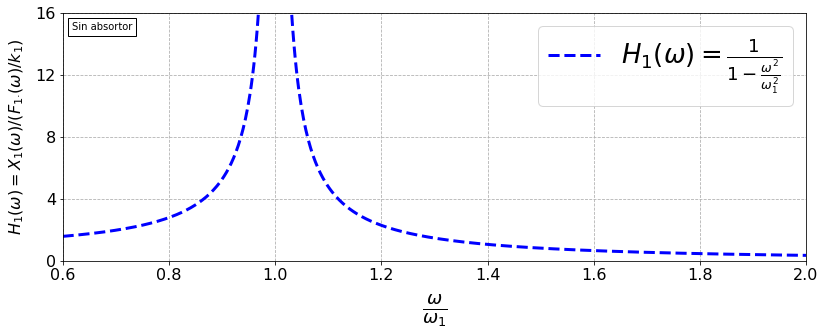

In [41]:
w    = np.linspace(0,100,10000)

m1   = 1000
k1   = 20000.0
w1   = np.sqrt(k1/m1)

H1   = 1/(1-(w**2/w1**2)) # X1(w)/(F1(w)/k1)

create_fig(w1,w,H1)

### Aislador y absortor dinámico no amortiguado

+ Re-organicemos el sistema principal más el absortor dinámico (ver Fig. 2), como un sistema de dos grados de libertad, como se observa en la Figura 3:

<p style="text-align:center">
	<img src="cuerpolibre.png" alt="MDOF" width=50%/></a><br>
    <strong> Figura 3: Sistema de vibraciones de dos grados de libertad y diagrama de cuerpo libre.</strong>
</p>

### Ecuación de movimiento de la masa 1:

$$
\begin{align*}
m_{1}\ddot x_{1} & = \sum F\\
m_{1}\ddot x_{1} & = f_{1}(t) + k_{2} (x_{2}-x_{1}) - k_{1}x_{1} \\
m_{1}\ddot x_{1} + (k_{1} + k_{2})x_{1} - k_{2}x_{2} & = f_{1}(t)
\end{align*}
$$

### Ecuación de movimiento de la masa 2:

$$
\begin{align*}
m_{2}\ddot x_{2} & = - k_{2} (x_{2}-x_{1})\\
m_{2}\ddot x_{2} + k_{2}(x_{2}-x_{1}) & = 0
\end{align*}
$$

### Ecuaciones de movimiento en forma de matrices:
$$
{\underbrace{\begin{bmatrix}
m_{1} & 0\\
0 & m_{2}
\end{bmatrix}}_{\text{matriz de masa}}}
\cdot{\overbrace{\begin{bmatrix}
\ddot x_{1} \\
\ddot x_{2}
\end{bmatrix}}^{\text{vector de aceleración}}}
+ {\underbrace{\begin{bmatrix}
k_{1} + k_{2} & -k_{2}\\
-k_{2} & k_{2}
\end{bmatrix}}_{\text{matriz de rigidez}}}\cdot{\overbrace{\begin{bmatrix}x_{1} \\
x_{2}
\end{bmatrix}}^{\text{vector de desplazamiento}}}={\overbrace{\begin{bmatrix}f_{1} \\
0
\end{bmatrix}}^{\text{vector de fuerza}}}
$$

+ Generalmente, se escribe una forma resumida como:
$$
\begin{align*}
M\,\ddot{\bf{x}}(t)+K\,{\bf{x}}(t) &= {\bf{F}}(t)
\end{align*}
$$

### Aplicar transformada de Fourier:
+ Aplicar la transformada de Fourier a la representación matricial y demostrar que:

$$
\begin{align*}
\left|H_{1}(\omega)\right| & = \frac{X_{1}(\omega)}{F_{1}(\omega)}\\
              & = \frac{k_{2}-m_{2}\omega^{2}}{(k_{1}+k_{2}-m_{1}\omega^{2})(k_{2}-m_{2}\omega^{2})-k_{2}^{2}}
\end{align*}
$$

$$
\begin{align*}
\left|H_{2}(\omega)\right| & = \frac{X_{2}(\omega)}{F_{1}(\omega)}\\
              & = \frac{k_{2}}{(k_{1}+k_{2}-m_{1}\omega^{2})(k_{2}-m_{2}\omega^{2})-k_{2}^{2}}
\end{align*}
$$

+ Es costumbre introducir $\mu$ como una razón entre la masa del absortor y la masa principal $m_{1}$:

$$
\begin{align*}
\mu&=\frac{m_{2}}{m_{1}}
\end{align*}
$$

de la cual,
$$
\begin{align*}
\frac{k_{2}}{k_{1}} &=\mu \left(\frac{\omega_{2}}{\omega_{1}}\right)^{2}
\end{align*}
$$


+ Demostrar que:

$$
\begin{align}
\frac{X_{1}(\omega)}{\left(\frac{F_{1}(\omega)}{k_{1}}\right)} & = \frac{1-\left( \frac{\omega}{\omega_{2}}\right) ^2}{\left[1+\mu\left( \frac{\omega_{2}}{\omega_{1}}\right)^2 - \left( \frac{\omega}{\omega_{1}}\right)^2\right]\left[ 1- \left( \frac{\omega}{\omega_{2}}\right)^2 \right] - \mu \left( \frac{\omega_{2}}{\omega_{1}}\right)^2}
\end{align}
$$

y que se cumple además, que:

$$
\begin{align}
\frac{X_{2}(\omega)}{\left(\frac{F_{1}(\omega)}{k_{1}}\right)} & = \frac{1}{\left[1+\mu\left( \frac{\omega_{2}}{\omega_{1}}\right)^2 - \left( \frac{\omega}{\omega_{1}}\right)^2\right]\left[ 1- \left( \frac{\omega}{\omega_{2}}\right)^2 \right] - \mu \left( \frac{\omega_{2}}{\omega_{1}}\right)^2}
\end{align}
$$


+ Como queremos reducir la vibración de $X_{1}(\omega)$, eso implica que podemos igualar a cero el numerador en la Ec. (1):

$$
\begin{align*}
\omega &= \omega_{2}
\end{align*}
$$

+ Así, para $\omega = \omega_{2},$ la Ec. (2) se reduce a:

$$
\begin{align*}
X_{2}(\omega) &= -\left(\frac{\omega_{1}}{\omega_{2}}\right)^{2}\,\frac{\left(\frac{F_{1}(\omega)}{k_{1}}\right)}{\mu}= -\frac{F_{1}(\omega)}{k_{2}}
\end{align*}
$$

+ Esto significa que la fuerza que ejerce el resorte del absortor (dada por $k_{2}X_{2}(\omega)$) sobre la masa principal, es igual y de signo opuesto a la fuerza aplicada originalmente de tal manera que la neutraliza. 


### Comportamiento con el absortor dinámico de vibraciones

No handles with labels found to put in legend.


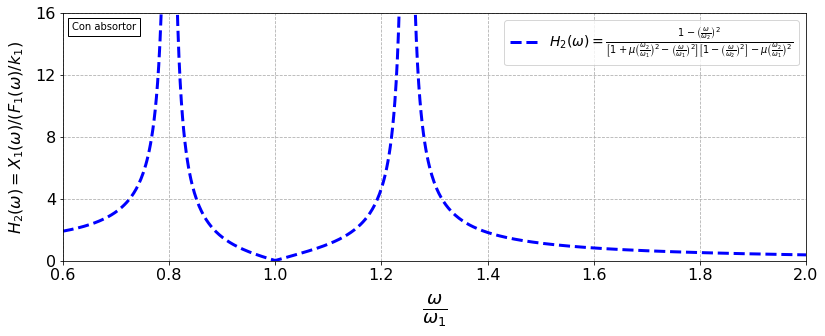

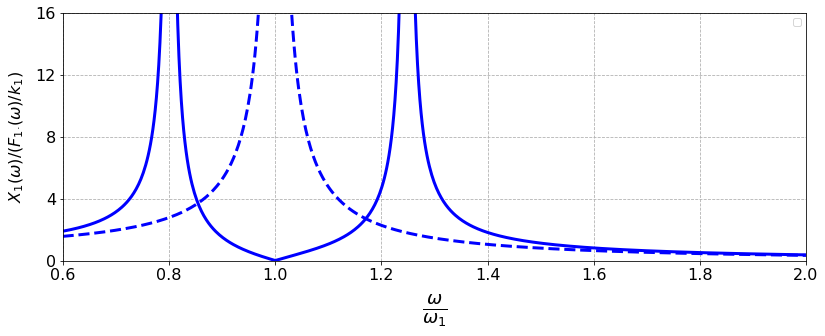

In [42]:
m2   = 200.0
k2   = 4000.0
w2   = np.sqrt(k2/m2)

mu   = (k2/k1)*(w1**2/w2**2)
#print(mu)

H2   = (1- (w/w2)**2)/((1 + mu*(w2/w1)**2 - (w/w2)**2)*(1 - (w/w2)**2) - mu*(w2/w1)**2)
create_fig2(w2,w,H2)

create_fig3(w1,w,H1,H2)

### Dos frecuencias resonantes
+ El absortor dinámico introduce dos frecuencias resonantes $\Omega_{1}$ y $\Omega_{2}$, en las cuales las amplitudes son infinitas. 

+ Obtener estas dos frecuencia e indicarlas en la gráfica.